<a href="https://colab.research.google.com/github/abduganievabdullokh/analyzing_datasets_PI/blob/main/Practical_assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Innovation | Assignment 11 | Data analysis
###Team:
#### Abduganiev Abdullokh   210076
#### Abdug'afforov Muzaffar 210068
#### Beknazarova Samodil    210047



#### **Data Source -** https://stat.uz/uz/rasmiy-statistika/bolalarga-oid-statistika


####**Data Selection -** Oila muhiti va bolalarni himoya qilish || Erta nikohlar soni

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('early_marriages_uz.csv')

# df.head(1)

In [2]:
df.rename(columns={'Klassifikator_en': 'Names'}, inplace=True)
clean_df = df.drop(columns=["Code", "Klassifikator", "Klassifikator_ru"])

In [5]:
def classify_category(name):
    if "Republic" in name:
        return "Republic"
    elif "city" in name:
        return "City"
    elif "district" in name:
        return "District"
    else:
        return "Region"

clean_df['Category'] = clean_df['Names'].apply(classify_category)

category_totals = clean_df.groupby('Category').sum(numeric_only=True)

city_rows = clean_df[clean_df['Names'].str.contains('city', case=False, na=False)]

years_columns = [str(year) for year in range(2010, 2024)]

city_performance = city_rows[['Names'] + years_columns]

city_performance.set_index('Names', inplace=True)


<ipython-input-6-e8f63829ceec>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


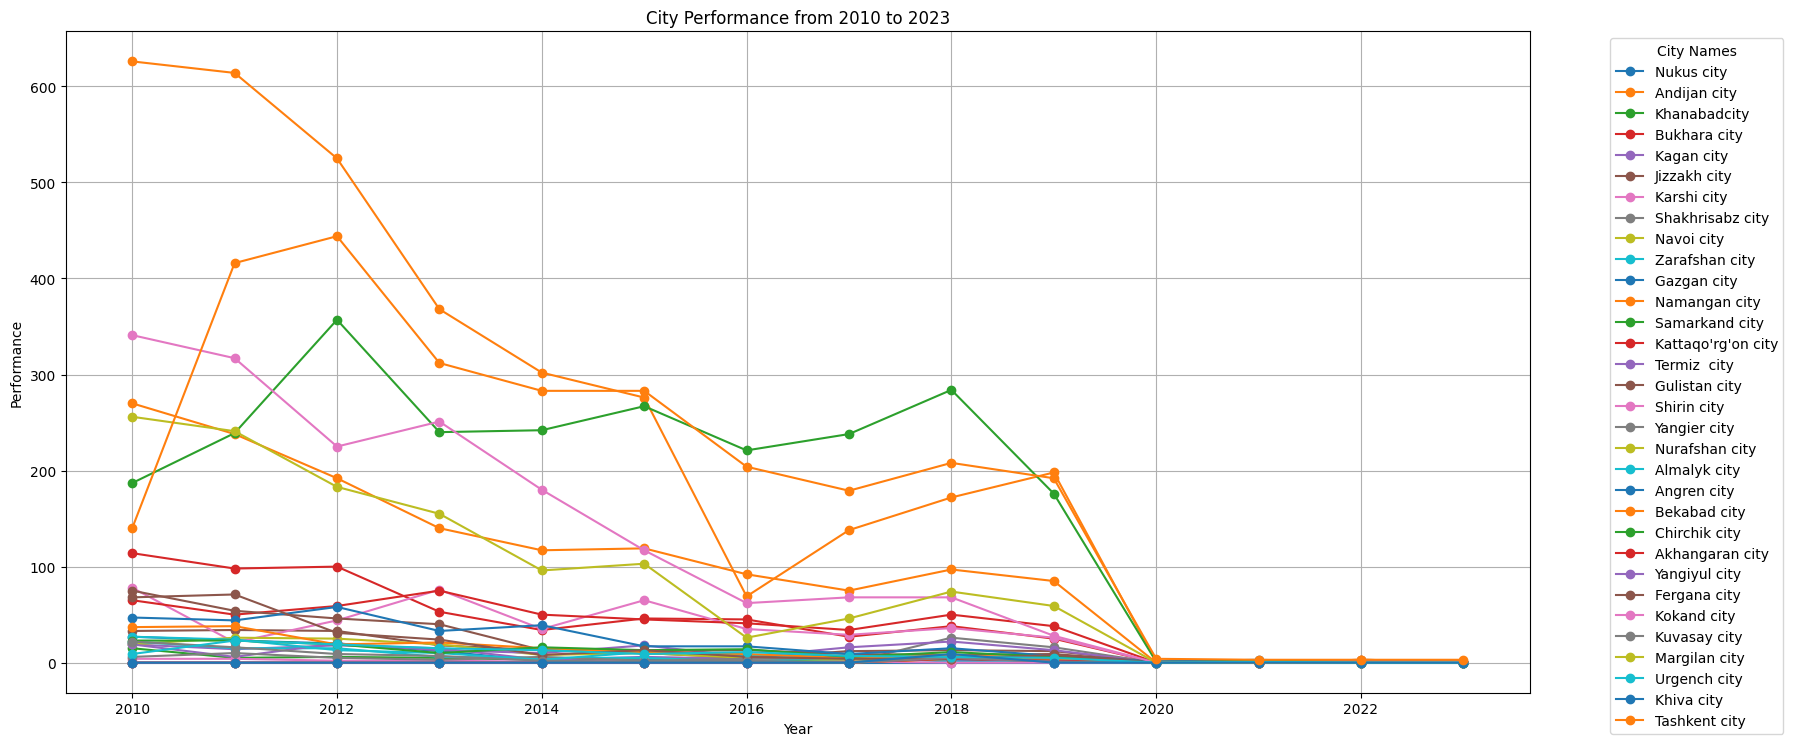

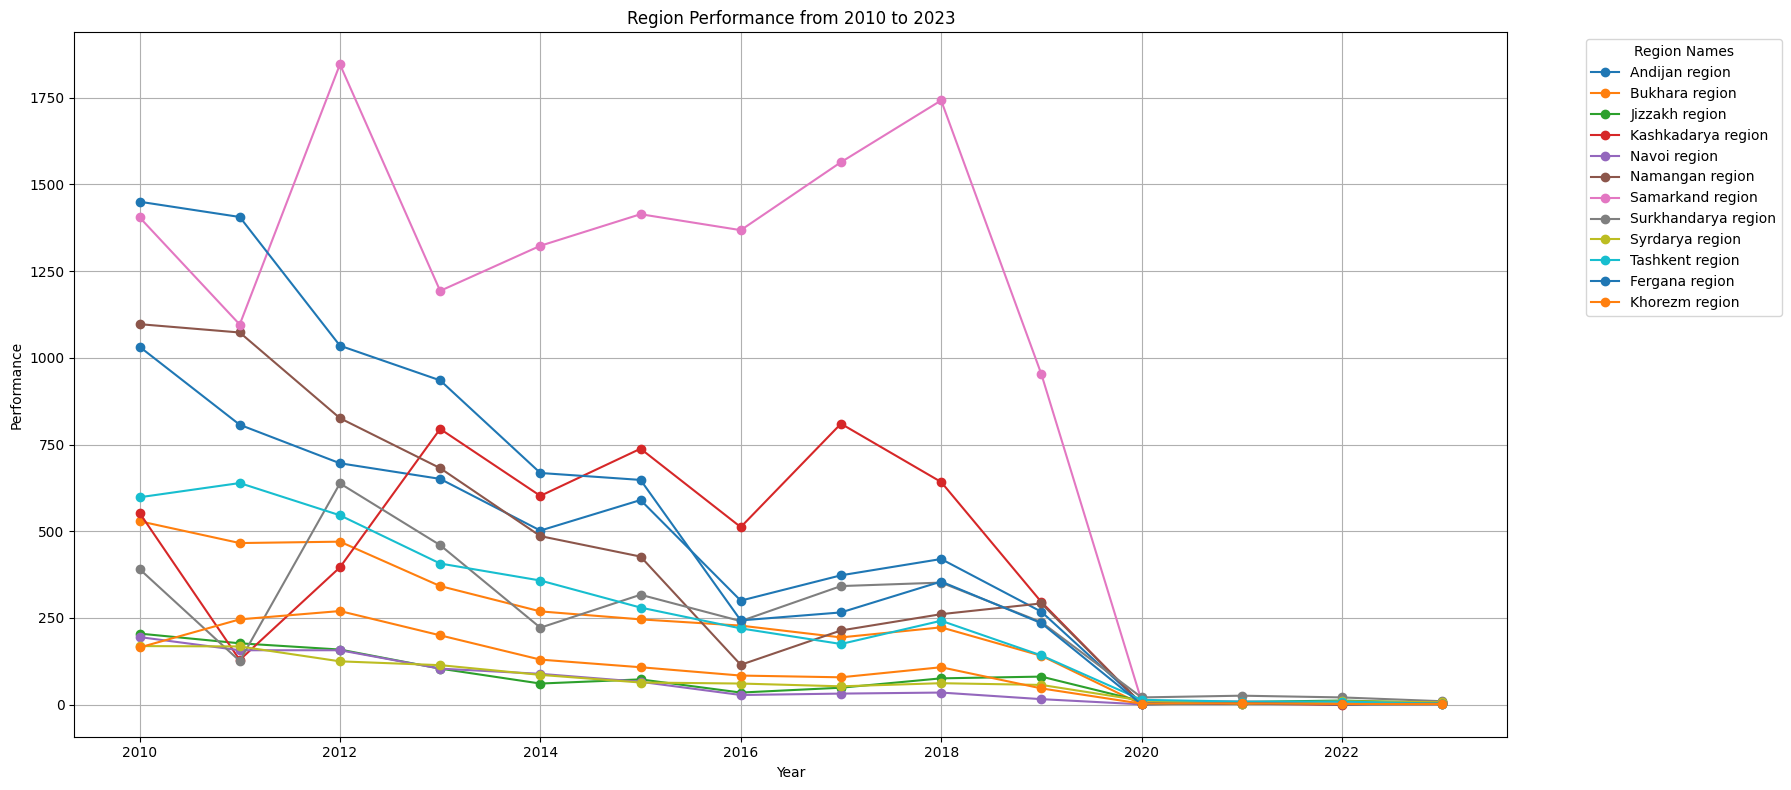

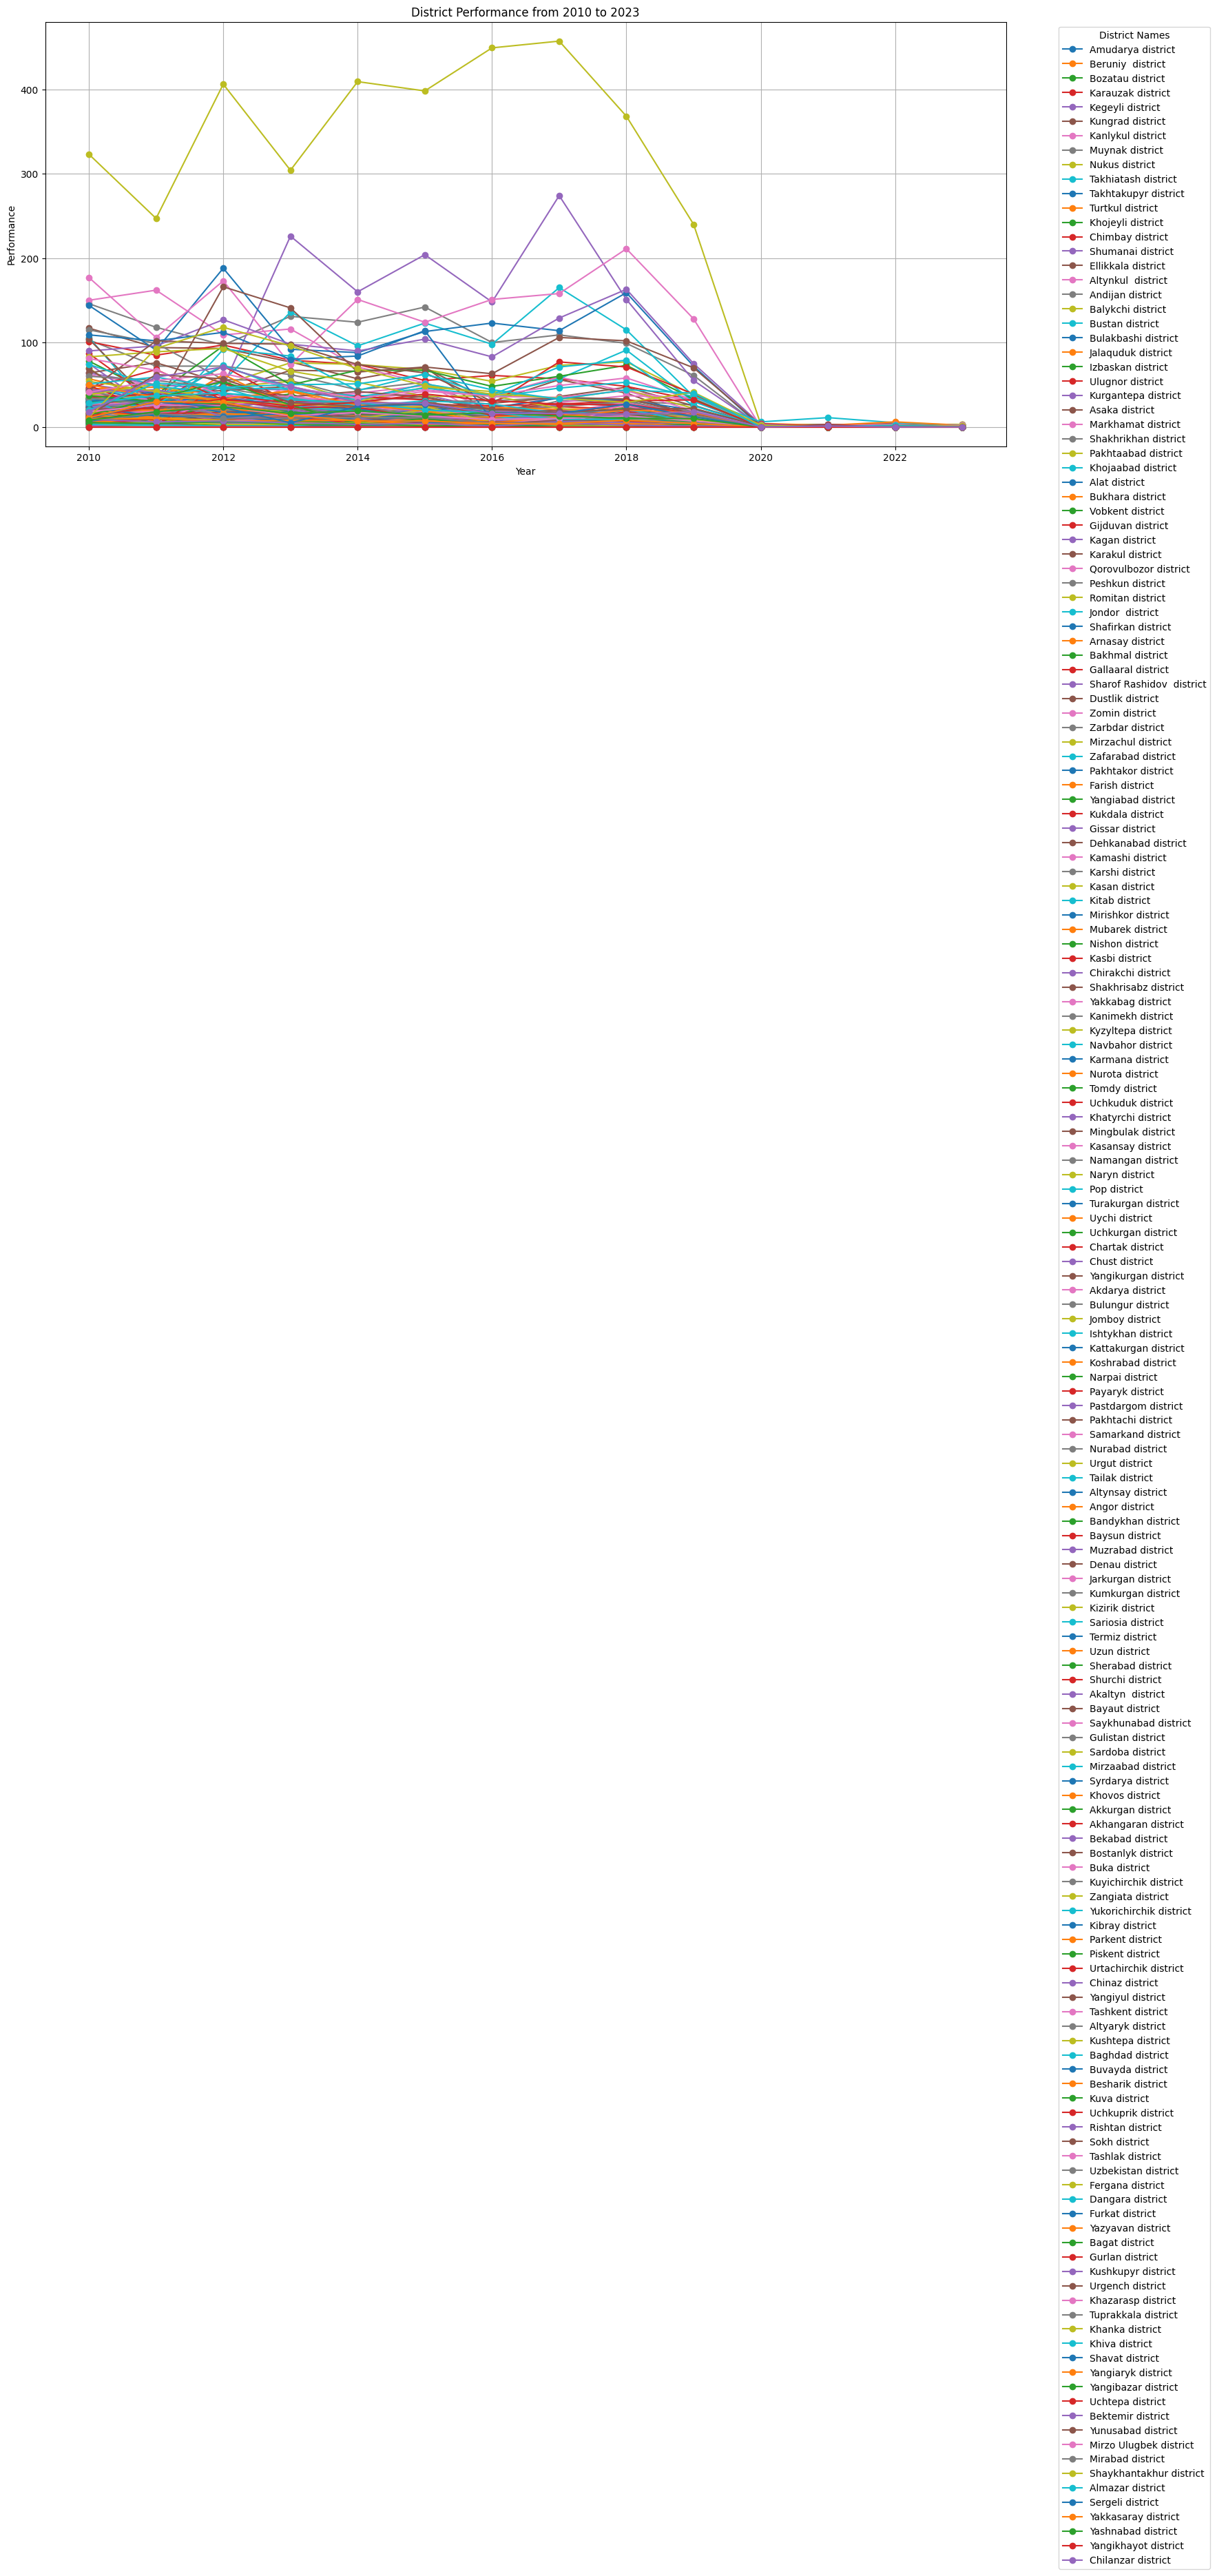

In [6]:
city_performance.T.plot(kind='line', figsize=(18, 8), marker='o', title="City Performance from 2010 to 2023")
plt.xlabel('Year')
plt.ylabel('Performance')
plt.legend(title='City Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

region_rows = clean_df[clean_df['Names'].str.contains('region', case=False, na=False)]

region_performance = region_rows[['Names'] + years_columns]

region_performance.set_index('Names', inplace=True)

region_performance.T.plot(kind='line', figsize=(18, 8), marker='o', title="Region Performance from 2010 to 2023")
plt.xlabel('Year')
plt.ylabel('Performance')
plt.legend(title='Region Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

district_rows = clean_df[clean_df['Names'].str.contains('district', case=False, na=False)]

district_performance = district_rows[['Names'] + years_columns]

district_performance.set_index('Names', inplace=True)

district_performance.T.plot(kind='line', figsize=(18, 8), marker='o', title="District Performance from 2010 to 2023")
plt.xlabel('Year')
plt.ylabel('Performance')
plt.legend(title='District Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()


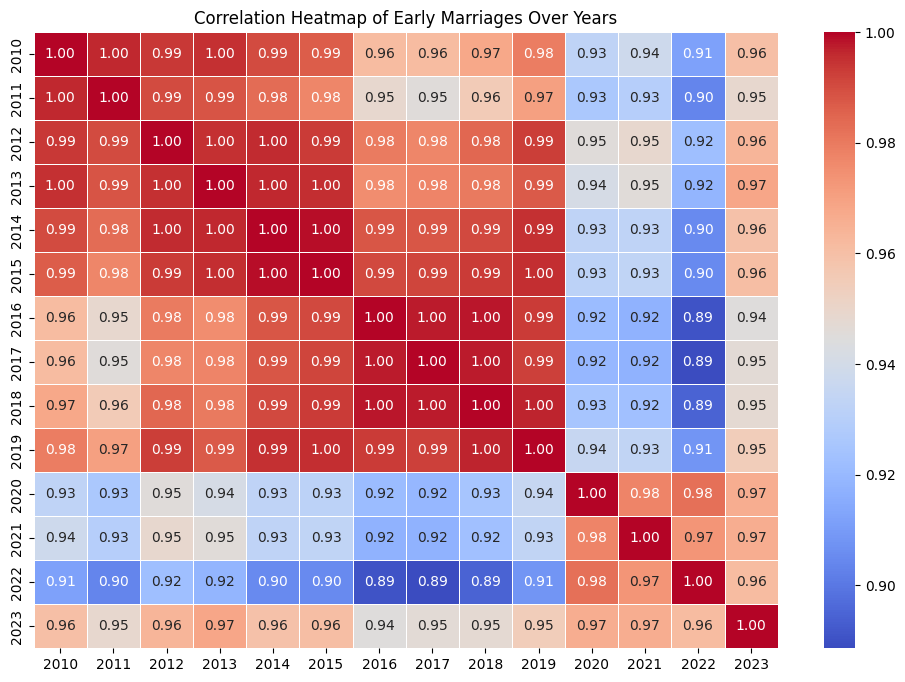

In [11]:
data_for_corr = clean_df[years_columns]

correlation_matrix = data_for_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Early Marriages Over Years')
plt.show()


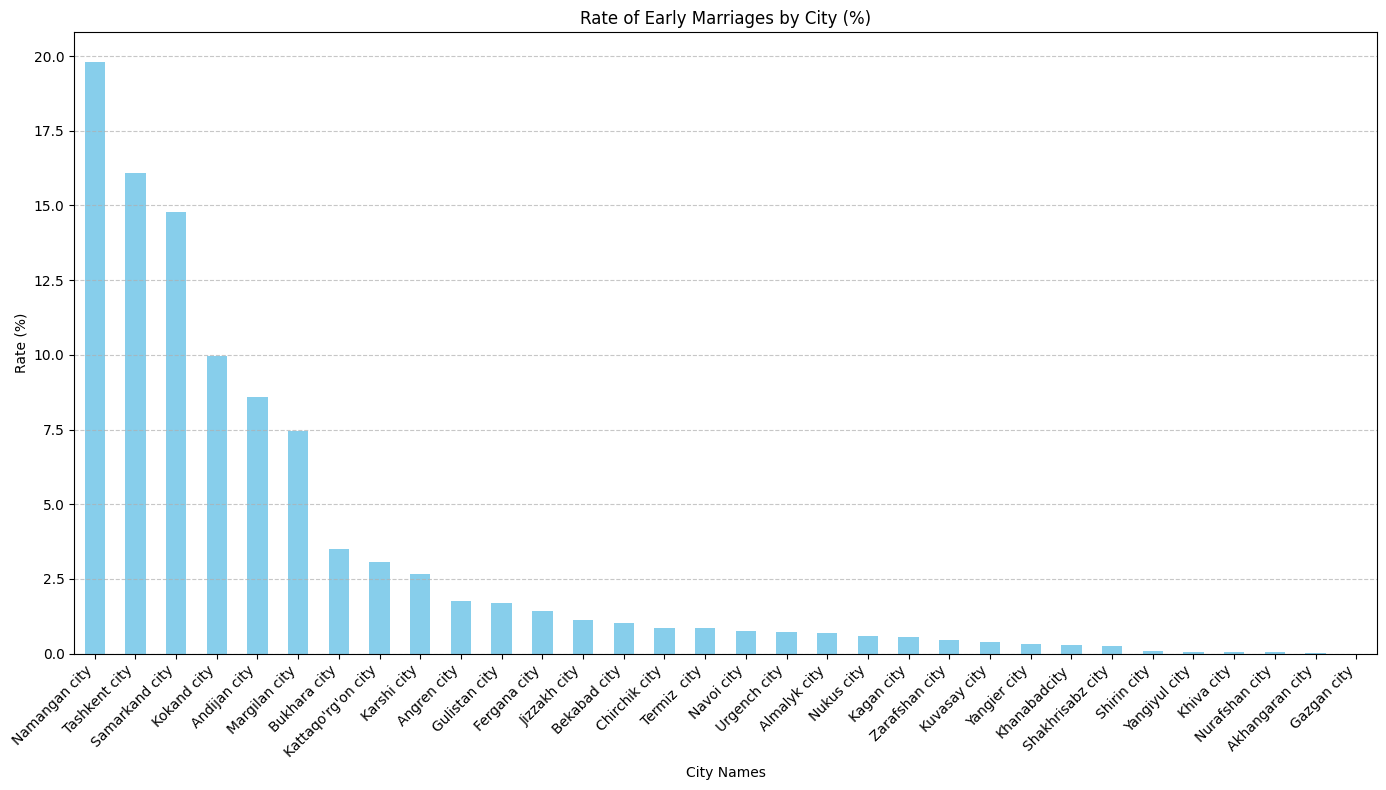

In [10]:
city_total_marriages = city_performance.sum(axis=1)
total_marriages_all_cities = city_total_marriages.sum()

city_rates = (city_total_marriages / total_marriages_all_cities) * 100

plt.figure(figsize=(14, 8))
city_rates.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Rate of Early Marriages by City (%)')
plt.xlabel('City Names')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Names,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Category
0,Republic of Uzbekistan,8223.0,7214.0,7839.0,6413.0,5145.0,5312.0,3707.0,4406.0,4786.0,3001.0,88.0,92.0,74.0,68.0,Republic
1,Republic of Karakalpakstan,294.0,308.0,231.0,114.0,66.0,58.0,68.0,76.0,60.0,43.0,1.0,5.0,0.0,2.0,Republic
2,Nukus city,27.0,23.0,20.0,12.0,2.0,3.0,5.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,City
3,Amudarya district,30.0,34.0,26.0,10.0,3.0,6.0,3.0,6.0,4.0,5.0,0.0,0.0,0.0,0.0,District
4,Beruniy district,27.0,34.0,30.0,13.0,1.0,7.0,7.0,12.0,8.0,4.0,0.0,1.0,0.0,0.0,District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Sergeli district,10.0,30.0,23.0,5.0,24.0,27.0,17.0,16.0,27.0,12.0,0.0,0.0,0.0,0.0,District
217,Yakkasaray district,11.0,30.0,29.0,14.0,7.0,7.0,4.0,4.0,8.0,4.0,0.0,0.0,0.0,0.0,District
218,Yashnabad district,8.0,18.0,24.0,16.0,19.0,14.0,17.0,13.0,10.0,10.0,0.0,0.0,0.0,0.0,District
219,Yangikhayot district,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,District
